In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re



In [71]:
df = pd.read_csv('logbook_assignment1.csv')
df2 = pd.read_csv('logbook_assignment1.csv')
df3 = pd.read_csv('logbook_assignment1.csv')
# let's print out how many entries there are in the dataset
print(len(df))

C:\Users\Wendy\AppData\Local\Temp\ipykernel_3844\1174220521.py:1: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('logbook_assignment1.csv')
C:\Users\Wendy\AppData\Local\Temp\ipykernel_3844\1174220521.py:2: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('logbook_assignment1.csv')


1174870


C:\Users\Wendy\AppData\Local\Temp\ipykernel_3844\1174220521.py:3: DtypeWarning: Columns (3,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df3 = pd.read_csv('logbook_assignment1.csv')


In [72]:
print(df)

                                               date_fueled date_captured  \
0        Cooling System, Heating System, Lights, Spark ...    Apr 7 2022   
1                                               Nov 7 2012   Aug 30 2016   
2                                              Sep 22 2012   Sep 28 2012   
3                                               May 4 2019    May 4 2019   
4                                              Feb 15 2022   Feb 15 2022   
...                                                    ...           ...   
1174865                                        Feb 19 2020   Feb 19 2020   
1174866                                         Dec 6 2019    Dec 6 2019   
1174867                                         Oct 4 2021    Oct 4 2021   
1174868                                        Jul 26 2021   Jul 26 2021   
1174869                                        Mar 12 2019   Mar 12 2019   

         odometer gallons cost_per_gallon total_spent   mpg    miles  \
0         73,37

# Question 1

In [73]:
#1.1
pattern = r'^[A-Z][a-z]{2} \d{1,2} \d{4}$'
date_fuel = df['date_fueled'].str.match(pattern)
percentage = (date_fuel.sum() / len(df)) * 100
proportion = 100-percentage
print(f"1. {proportion:.2f}% of rows don't match the correct date format.")

1. 11.68% of rows don't match the correct date format.


In [74]:
#Filling in dates as proxy
valid_fueled = df['date_fueled'].astype(str).str.match(pattern)
valid_capture = df['date_captured'].astype(str).str.match(pattern)

df.loc[~valid_fueled & valid_capture, 'date_fueled'] = df['date_captured']
print("2. The dates filled in as a proxy")
df.head()

2. The dates filled in as a proxy


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,Apr 7 2022,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,Nov 7 2012,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,Sep 22 2012,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,May 4 2019,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,Feb 15 2022,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [75]:

df['date_fueled'] = pd.to_datetime(df['date_fueled'], errors='coerce')
df.loc[~df['date_fueled'].dt.year.between(1900, 2099), 'date_fueled'] = pd.NaT
print("3.")
df.head()

3.


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,2022-04-07,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


In [76]:
#Removing dates before 2005, and dates in the future relative to 1 Septemeber 2025
min_date = pd.Timestamp("2005-01-01")
max_date = pd.Timestamp("2025-09-01")
mask = (df['date_fueled'] >= min_date) & (df['date_fueled'] <= max_date)
df = df.loc[mask]

print("4. Removed dates that are in the future relative to 1st September 2025 and before 2005")
df.head()

4. Removed dates that are in the future relative to 1st September 2025 and before 2005


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
0,2022-04-07,Apr 7 2022,"73,370",NaN,NaN,NaN,NaN,NaN,https://www.somewebsite.com/suzuki/swift/2015/...
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,NaN,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,NaN,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,NaN,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.4,https://www.somewebsite.com/honda/passport/201...


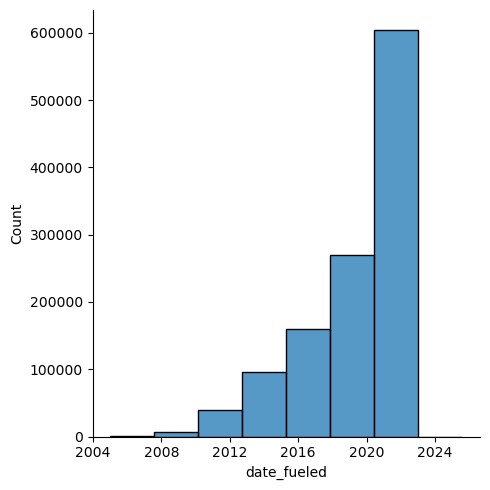

In [77]:
sns.displot(df, x="date_fueled", binwidth = 1000)
#make a comment on the distribution of the data.

In [78]:
#1.2
gallons_null_count = df['gallons'].isnull().sum()
gal_per = (gallons_null_count / len(df)) * 100
print(f"The percentage of missing gallons values is {gal_per:.2f}%")

miles_count = df['miles'].isnull().sum()
miles_per = (miles_count / len(df)) * 100
print(f"The percentage of missing miles values is {miles_per:.2f}%")

odometer_count = df['odometer'].isnull().sum()
odometer_per = (odometer_count/ len(df)) * 100
print(f"The percentage of missing odometer values is {odometer_per:.2f}%")



The percentage of missing gallons values is 6.32%
The percentage of missing miles values is 87.55%
The percentage of missing odometer values is 12.69%


In [79]:
#converting everything to a float
print("3. Converting the numerical values to floats, after removing the commas: ")
df['gallons'] = df['gallons'].str.replace(",", '').astype(float)
df['mpg']= df['mpg'].str.replace(",", '').astype(float)
df['miles'] = df['miles'].str.replace(",", '').astype(float)


3. Converting the numerical values to floats, after removing the commas: 


In [85]:
print("2. Calculations of the other interdependant columns")

df = df.dropna(subset=['miles', 'gallons', 'mpg'], thresh=2)
df['miles'] = df['gallons']*df['mpg']
df['gallons'] = df['miles']/df['mpg']
df['mpg'] = df['miles']/df['gallons']

df.head()

2. Calculations of the other interdependant columns


,date_fueled,date_captured,odometer,gallons,cost_per_gallon,total_spent,mpg,miles,user_url
1,2012-11-07,Aug 30 2016,"11,983",12.120,$5.599,$67.86,31.6,382.9920,https://www.somewebsite.com/bmw/x3/2009/461150
2,2012-09-22,Sep 28 2012,"98,233",7.991,£5.45,£43.53,28.5,227.7435,https://www.somewebsite.com/mercedes-benz/e300...
3,2019-05-04,May 4 2019,"163,802",10.575,£5.11,£54.00,46.8,494.9100,https://www.somewebsite.com/bmw/320d/2010/247233
4,2022-02-15,Feb 15 2022,NaN,11.651,$3.029,$35.29,21.0,244.6710,https://www.somewebsite.com/honda/passport/201...
5,2021-10-23,Oct 23 2021,"147,567",3.413,$3.739,$12.76,29.0,98.9770,https://www.somewebsite.com/volkswagen/passat/...


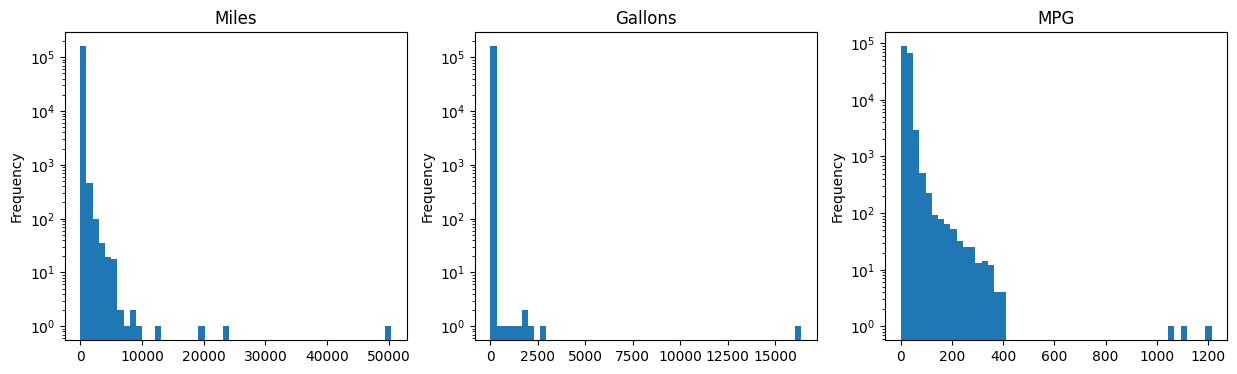

In [86]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

df['miles'].plot(kind='hist', bins=50, ax=axes[0], title='Miles', log=True)
df['gallons'].plot(kind='hist', bins=50, ax=axes[1], title='Gallons',log=True)
df['mpg'].plot(kind='hist', bins=50, ax=axes[2], title='MPG', log=True)

plt.show()


In [82]:
df.describe()

,date_fueled,gallons,mpg,miles
count,1174288,160725.000000,160723.000000,184008.000000
mean,2019-06-05 11:18:54.010055424,12.953728,25.418163,264.498808
min,2005-01-02 00:00:00,0.000000,0.100000,0.000000
25%,2017-10-16 00:00:00,9.490000,18.200000,180.110850
50%,2020-08-03 00:00:00,12.280000,23.300000,266.747450
75%,2021-10-26 00:00:00,15.113000,29.800000,342.454250
max,2025-08-09 00:00:00,16378.667000,1214.300000,50356.800000
std,NaN,42.923320,14.909832,235.476993


In [83]:

df.describe(include=['O'], exclude=None)


,date_captured,odometer,cost_per_gallon,total_spent,user_url
count,1174288,1025251,1093574,1100122,1174288
unique,4999,261362,52737,189982,120201
top,Aug 31 2016,1,$2.999,$0.00,https://www.somewebsite.com/jeep/wrangler/2007...
freq,4346,156,14698,6174,29


# Question 2

In [17]:
# 2.1
def extract_currency(value):
    if pd.isnull(value):
        return None
    match = re.match(r"^([^\d.]+)", str(value))  
    return match.group(1).strip() if match else None

df["currency"] = df["total_spent"].apply(extract_currency)

In [18]:
# 2.2

def to_float(value):
    if pd.isnull(value):
        return None
    cleaned = re.sub(r"[^\d.]", "", str(value))  # keep only numbers and dot
    try:
        return float(cleaned)
    except ValueError:
        return None

df["total_spent_float"] = df["total_spent"].apply(to_float)
df["cost_per_gallon_float"] = df["cost_per_gallon"].apply(to_float)

In [19]:
# 2.3

def parse_user_url(url):
    try:
        parts = url.strip("/").split("/")
        user_id = parts[-1]
        car_make, car_model, car_year = None, None, None
        if "car" in parts:
            idx = parts.index("car")
            if len(parts) > idx + 3:
                car_make = parts[idx + 1]
                car_model = parts[idx + 2]
                car_year = parts[idx + 3] if parts[idx + 3].isdigit() else None
        return pd.Series([car_make, car_model, car_year, user_id])
    except:
        return pd.Series([None, None, None, None])

df[["car_make", "car_model", "car_year", "user_id"]] = df["user_url"].apply(parse_user_url)

In [20]:
# 2.4 

df["litres_filled"] = pd.to_numeric(df["gallons"], errors="coerce") * 3.78541
df["km_driven"] = pd.to_numeric(df["miles"], errors="coerce") * 1.60934
df["litres_per_100km"] = (df["litres_filled"] / df["km_driven"]) * 100

In [21]:
print(df[[
    "currency", "total_spent_float", "cost_per_gallon_float",
    "car_make", "car_model", "car_year", "user_id",
    "litres_filled", "km_driven", "litres_per_100km"
]].head())

  currency  total_spent_float  cost_per_gallon_float car_make car_model  \
0     None                NaN                    NaN     None      None   
1        $              67.86                  5.599     None      None   
2        £              43.53                  5.450     None      None   
3        £              54.00                  5.110     None      None   
4        $              35.29                  3.029     None      None   

  car_year  user_id  litres_filled   km_driven  litres_per_100km  
0     None   674857            NaN         NaN               NaN  
1     None   461150      45.879169  616.364345          7.443514  
2     None   133501      30.249211  366.516724          8.253160  
3     None   247233      40.030711  796.478459          5.025963  
4     None  1038865      44.103812  393.758827         11.200717  
